# Modelos de Regresión Lineal

## Modelo con datos simulados

* y = a + b * x
* X : 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 12 + 2.6 * x + e$
* e estará distribuida según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 12 + 2.6 * x

In [5]:
y_act = 12 + 2.6 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        'x' : x_list,
        'y_act' : y_act_list,
        'y_pred' : y_pred_list
    }
)

In [8]:
data.head()

,x,y_act,y_pred
0,2.270379,18.707221,17.902987
1,3.733928,20.716494,21.708213
2,0.199237,12.806097,12.518016
3,6.099902,27.560202,27.859745
4,-2.653040,5.910060,5.102097


In [9]:
y_mean = [np.mean(data['y_act']) for i in range(1, len(x_list) + 1)]

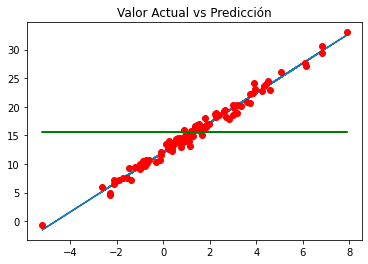

In [10]:
plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'],data['y_act'], 'ro')
plt.plot(data['x'], y_mean, 'g') # promedio de todas las y
plt.title('Valor Actual vs Predicción')
plt.show()

### ¿Cómo es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos respecto a su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR/SST, coeficiente de determinación entre 0 y 1

In [11]:
data['SSR'] = (data['y_pred'] - np.mean(data['y_act']))**2
data['SSD'] = (data['y_pred'] - data['y_act'])**2
data['SST'] = (data['y_act'] - np.mean(data['y_act']))**2

In [12]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,2.270379,18.707221,17.902987,5.734564,0.646793,10.233148
1,3.733928,20.716494,21.708213,38.439024,0.983506,27.125376
2,0.199237,12.806097,12.518016,8.941751,0.082991,7.301856
3,6.099902,27.560202,27.859745,152.558397,0.089726,145.248541
4,-2.653040,5.910060,5.102097,108.288883,0.652805,92.126044


In [13]:
SSR = sum(data['SSR'])
SST = sum(data['SST'])
SSD = SST - SSR

In [14]:
SSR

3500.77040367913

In [15]:
SSD

34.95887257784534

In [16]:
SST

3535.7292762569755

In [17]:
R2 = SSR/SST
R2

0.9901126840189377

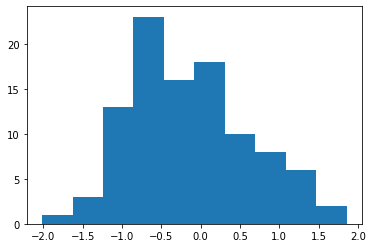

In [18]:
plt.hist(data['y_pred'] - data['y_act'])
plt.show()

### Obteniendo la recta de regresión

* y = a + b * x
* b = sum((xi - x_m) * (y_i-y_m)) / sum((xi-x_m)^2)
* a = y_m - b * x_m

In [19]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_act'])
x_mean, y_mean

(1.2957416438658165, 15.508291654367076)

In [20]:
data['beta_n'] = (data['x'] - x_mean) * (data['y_act'] - y_mean)
data['beta_d'] = (data['x'] - x_mean)**2

In [21]:
beta = sum(data['beta_n'])/sum(data['beta_d'])

In [22]:
alpha = y_mean - beta * x_mean

In [23]:
alpha, beta

(12.149658733456537, 2.5920544707432045)

Modelo lineal obtenido por regresión es: y = 11.968324559330153 + 2.564485452904129 * x

In [24]:
data['y_model'] = alpha + beta * data['x']

In [25]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.270379,18.707221,17.902987,5.734564,0.646793,10.233148,3.117797,0.949919,18.034606
1,3.733928,20.716494,21.708213,38.439024,0.983506,27.125376,12.698569,5.944753,21.828204
2,0.199237,12.806097,12.518016,8.941751,0.082991,7.301856,2.962970,1.202323,12.666091
3,6.099902,27.560202,27.859745,152.558397,0.089726,145.248541,57.899308,23.079956,27.960937
4,-2.653040,5.910060,5.102097,108.288883,0.652805,92.126044,37.901315,15.592873,5.272836


In [26]:
SSR = sum((data['y_model'] - np.mean(data['y_act']))**2)
SSD = sum((data['y_model'] - data['y_act'])**2)
SST = sum((data['y_act'] - np.mean(data['y_act']))**2)

In [27]:
SSR, SSD, SST

(3477.4762164628437, 58.253059794133115, 3535.7292762569755)

In [28]:
R2 = SSR / SST
R2

0.9835244569811068

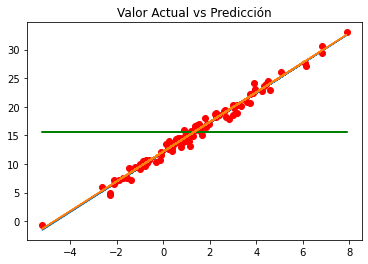

In [29]:
y_mean = [np.mean(data['y_act']) for i in range(1, len(x_list) + 1)]

plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'],data['y_act'], 'ro')
plt.plot(data['x'], y_mean, 'g') # promedio de todas las y
plt.plot(data['x'], data['y_model'])
plt.title('Valor Actual vs Predicción')
plt.show()

### Error estándar de los residuos (RSE)

In [30]:
RSE = np.sqrt(SSD/(len(data) - 2))
RSE

0.7709857180850721

In [31]:
np.mean(data['y_act'])

15.508291654367076

In [32]:
print('El error es del: {}% '.format(round(((RSE / np.mean(data['y_act']))*100), 2)))

El error es del: 4.97% 
